In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
# box-cox变换用到
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p


In [9]:
datas=pd.read_csv("./IRIS.csv",header=0)

In [10]:
datas

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
targetKinds=datas["species"].unique()

In [30]:
targetKindToIdx={}
for i in range(targetKinds.shape[0]):
    targetKindToIdx[targetKinds[i]]=i+1

In [32]:
datas["target"]=datas["species"].apply(lambda kind:targetKindToIdx[kind])

In [35]:
datas.drop("species",axis=1)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [37]:
# 箱型图适合类别变量，这是为类别变量定制的
def customized_cat_boxplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize=(12,8))
    sns.boxplot(y=y,x=x)

In [55]:
datas.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'target'],
      dtype='object')

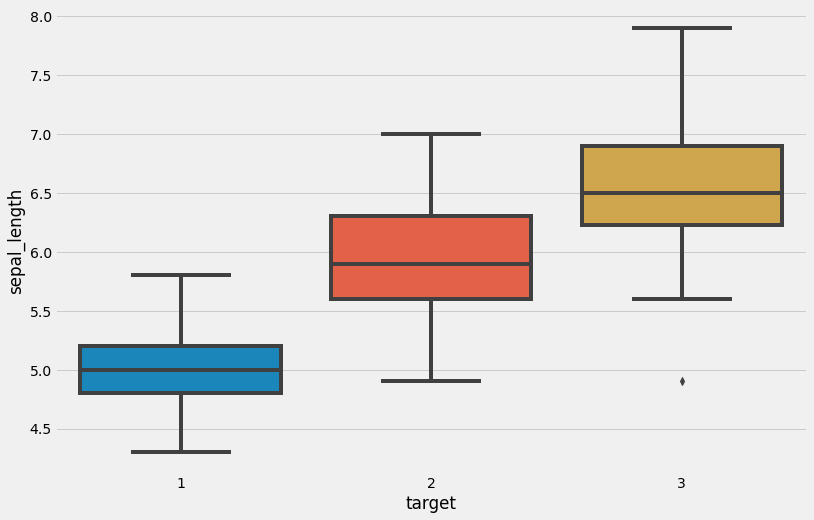

In [56]:
customized_cat_boxplot(x=datas["target"],y=datas["sepal_length"])

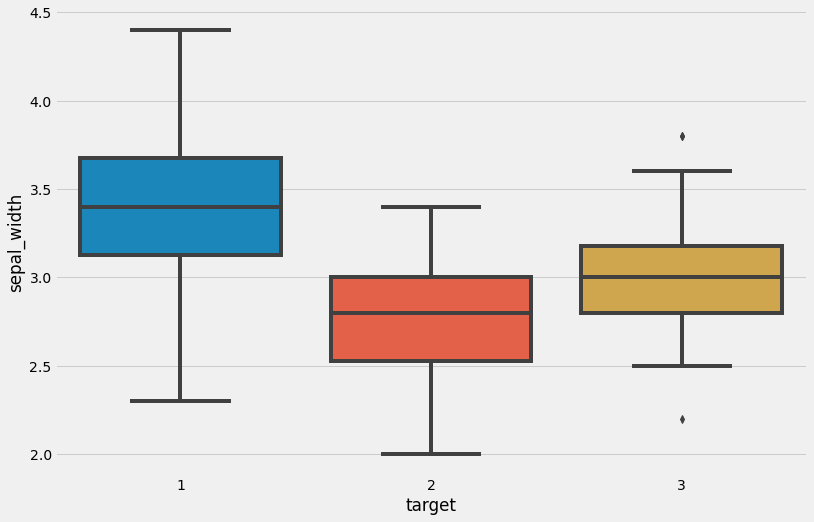

In [57]:
customized_cat_boxplot(x=datas["target"],y=datas["sepal_width"])

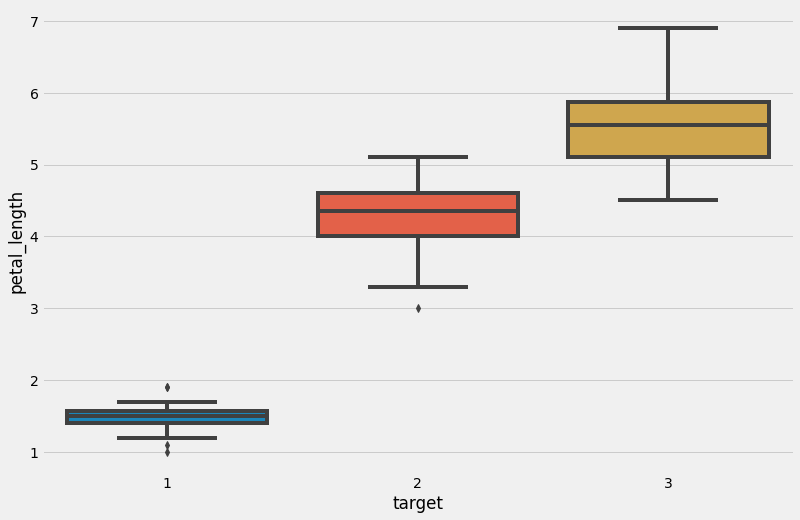

In [58]:
customized_cat_boxplot(x=datas["target"],y=datas["petal_length"])

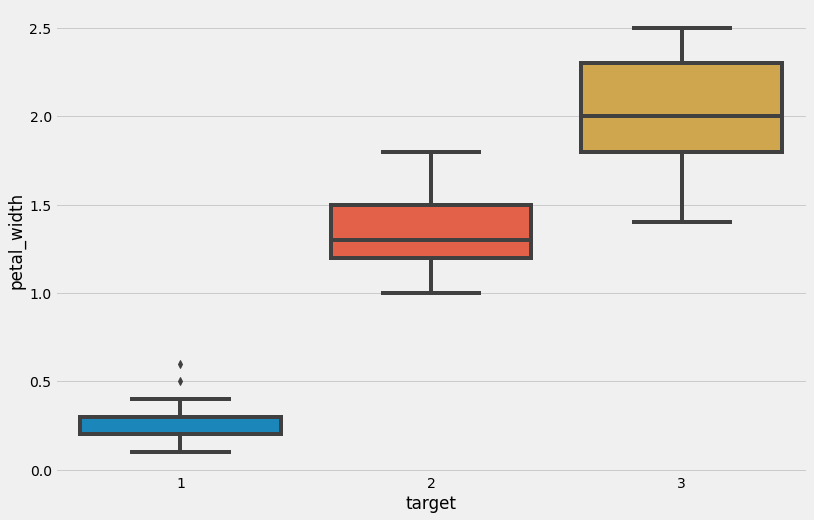

In [59]:
customized_cat_boxplot(x=datas["target"],y=datas["petal_width"])

In [60]:
import torch.nn as nn

In [63]:
Class